In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import h5py

# Load Data from Ring $i$

In [3]:
# Pick a ring index i
i = 3

# Load the data. 
# In this example we load the MOS data.
# The PN data is located at 
# '../data/XMM-BSO-dataset-PN.hdf5'
MOS = h5py.File('../data/XMM-BSO-dataset-MOS.hdf5', 'r')
Emin_Out = np.array(MOS['emin_o']) # Minimum output bin energy [keV]
Emax_Out = np.array(MOS['emax_o']) # Maximum output bin energy [keV]
Emin_In = np.array(MOS['emin_i']) # Minimum input (true) bin energy [keV]
Emax_In = np.array(MOS['emax_i']) # Maximum input (true) bin energy [keV]
Ring_Dat = MOS['ring_'+str(i)]
Counts = np.array(Ring_Dat['cts']) # Total Counts in each Output Bin
Exp = np.array(Ring_Dat['exp'] )# Total Exposure Time [s]
Wht = np.array(Ring_Dat['wht']) # The weight of the bin, used for combining rings [s*sr]
D_Fid = np.array(Ring_Dat['Dfc_fid']) # Fiducial D-factor [keV/cm^2]
D_NFW = np.array(Ring_Dat['Dfc_NFW']) # Fiducial NFW D-factor [keV/cm^2]
D_cDM = np.array(Ring_Dat['Dfc_cDM']) # Fiducial contracted D-factor [keV/cm^2]

*The appropriate solid angle of each ring is not the geometric solid angle.* Using the geometric angle is a several order-of-magnitude overestimate. One should only use `Wht` to combine datasets. If one requires a solid angle, we recommend using `Wht/Exp`, which is the exposure-weighted average solid angle of each observation.

## Plot measured spectrum

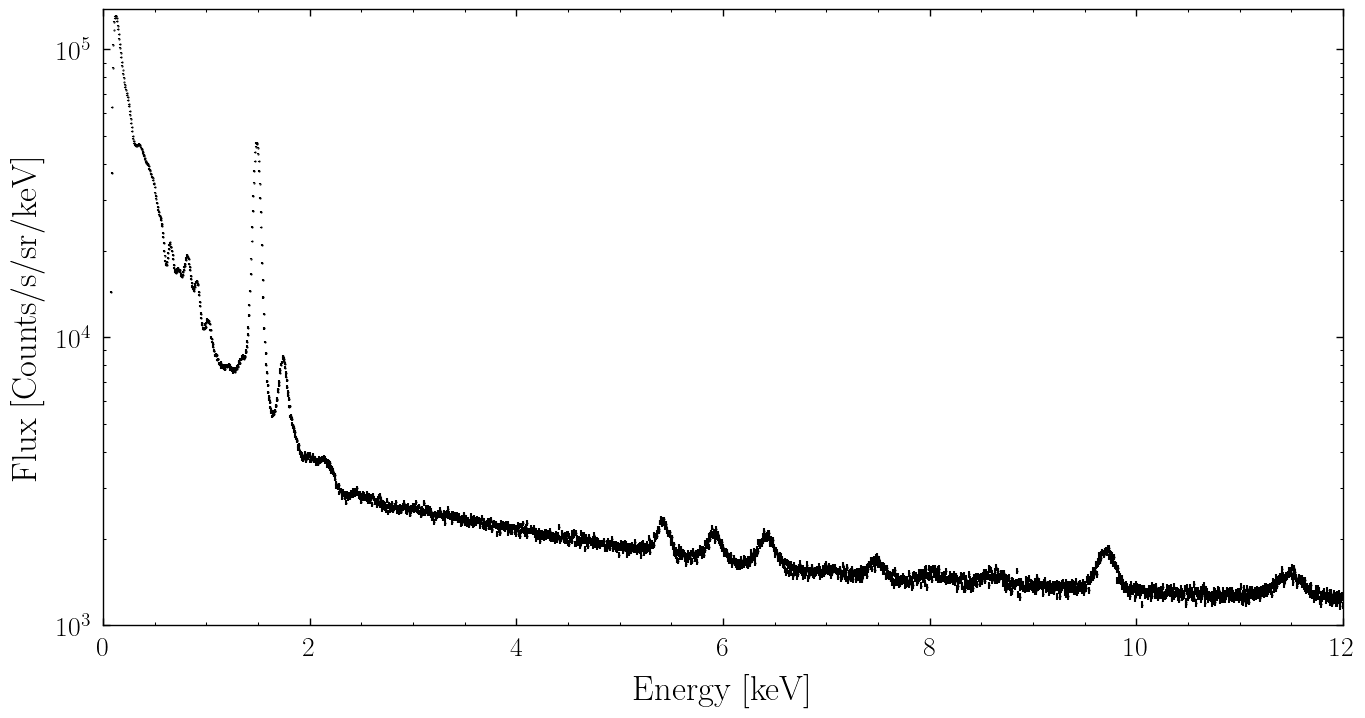

In [4]:
Emean_Out = np.mean([Emin_Out,Emax_Out],axis=0)
dE_Out = Emax_Out - Emin_Out
Flux = Counts / Wht / dE_Out
Err = np.sqrt(Counts) / Wht / dE_Out

plt.errorbar(Emean_Out, Flux, yerr = Err, fmt = '.', ms = 1, color = 'k')
plt.xlim(0, 12)
plt.ylim(1e3, None)
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [Counts/s/sr/keV]');

Now we plot the count rate. This agrees approximately with [the XMM background characterization](https://www.aanda.org/articles/aa/pdf/2007/12/aa5882-06.pdf), indicating that our data is dominated not by astrophysical but by instrumental backgrounds.

Text(0, 0.5, 'Count Rate [Counts/s/keV]')

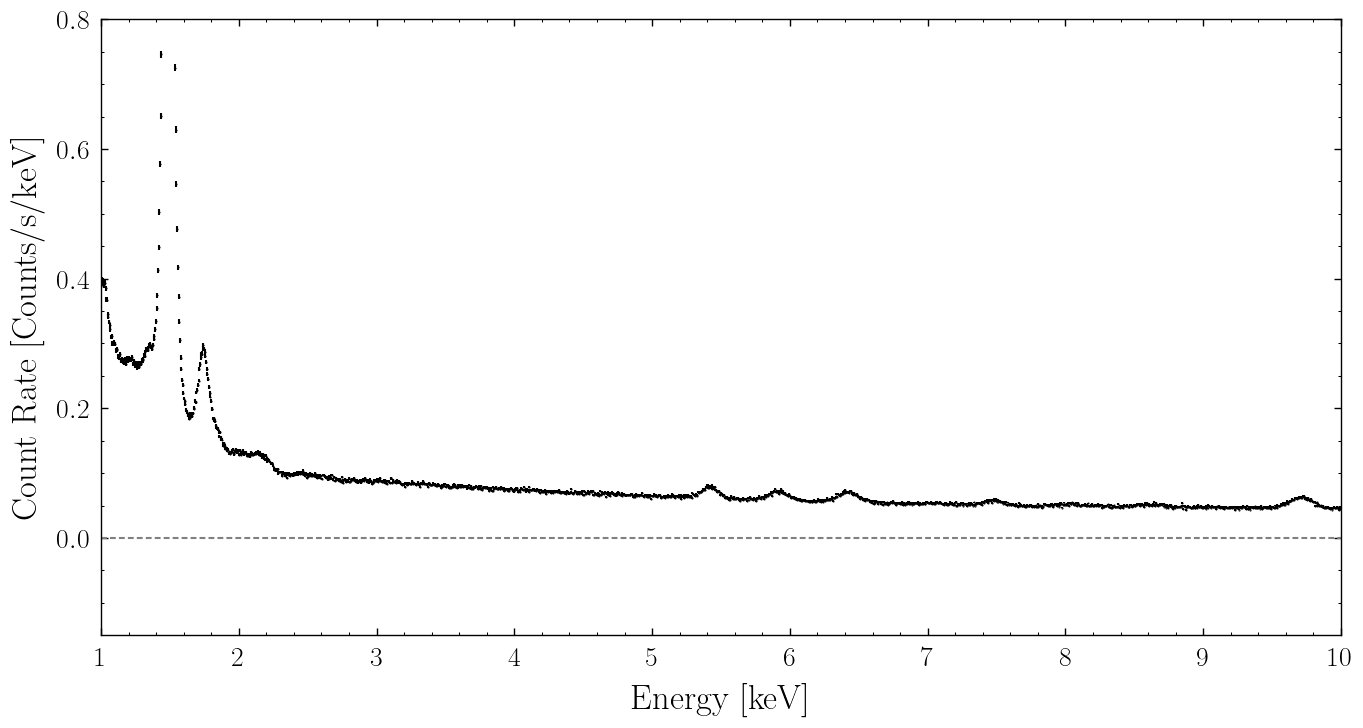

In [5]:
Emean_Out = np.mean([Emin_Out,Emax_Out],axis=0)
dE_Out = Emax_Out - Emin_Out
Flux = Counts / Exp / dE_Out
Err = np.sqrt(Counts) / Exp / dE_Out

plt.errorbar(Emean_Out, Flux, yerr = Err, fmt = '.', ms = 1, color = 'k')
plt.axhline(0, color = 'gray', linestyle = '--')
plt.xlim(1, 10)
plt.ylim(-0.15, 0.8)
# plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('Count Rate [Counts/s/keV]')

## Plot spectrum in physical units
The required detector responses are available at our [Zenodo](https://zenodo.org/records/4498564#.YBrb3OhKj_U), but not through this github. One can download the MOS response with, e.g.
`wget https://zenodo.org/records/4498564/files/XMM-BSO-dataset-MOS.hdf5`. We assume it has been placed in a folder `SuppData/dtr/`.

The effective area is derived by summing the `dtr` along the zeroth axis.

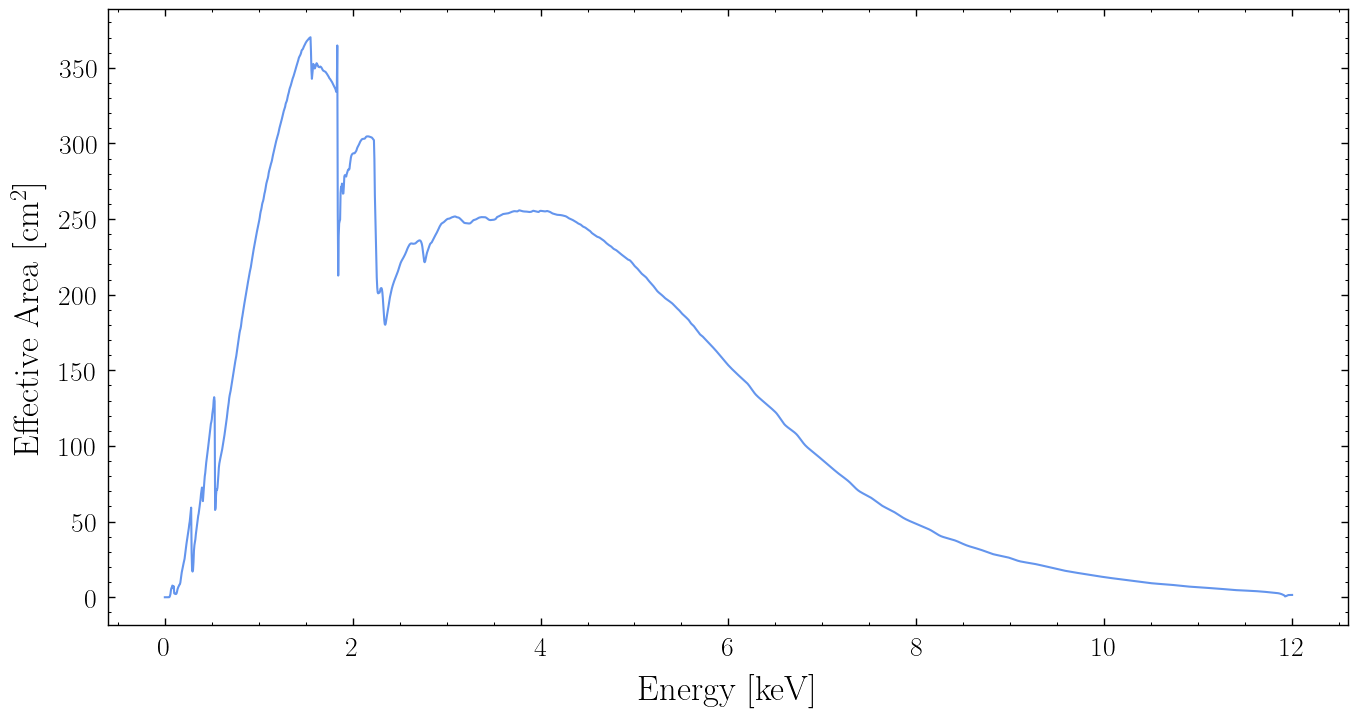

In [6]:
MOSdtr = h5py.File('../SuppData/dtr/XMM-BSO-dataset-MOS.hdf5', 'r')
Ring_Dat = MOSdtr['ring_'+str(i)]
dtr = Ring_Dat['dtr']

Eff_Area = np.sum(dtr, axis = 0)
Emean_In = np.mean([Emin_In,Emax_In],axis=0)
plt.plot(Emean_In, Eff_Area)
plt.xlabel('Energy [keV]')
plt.ylabel('Effective Area [cm$^2$]');

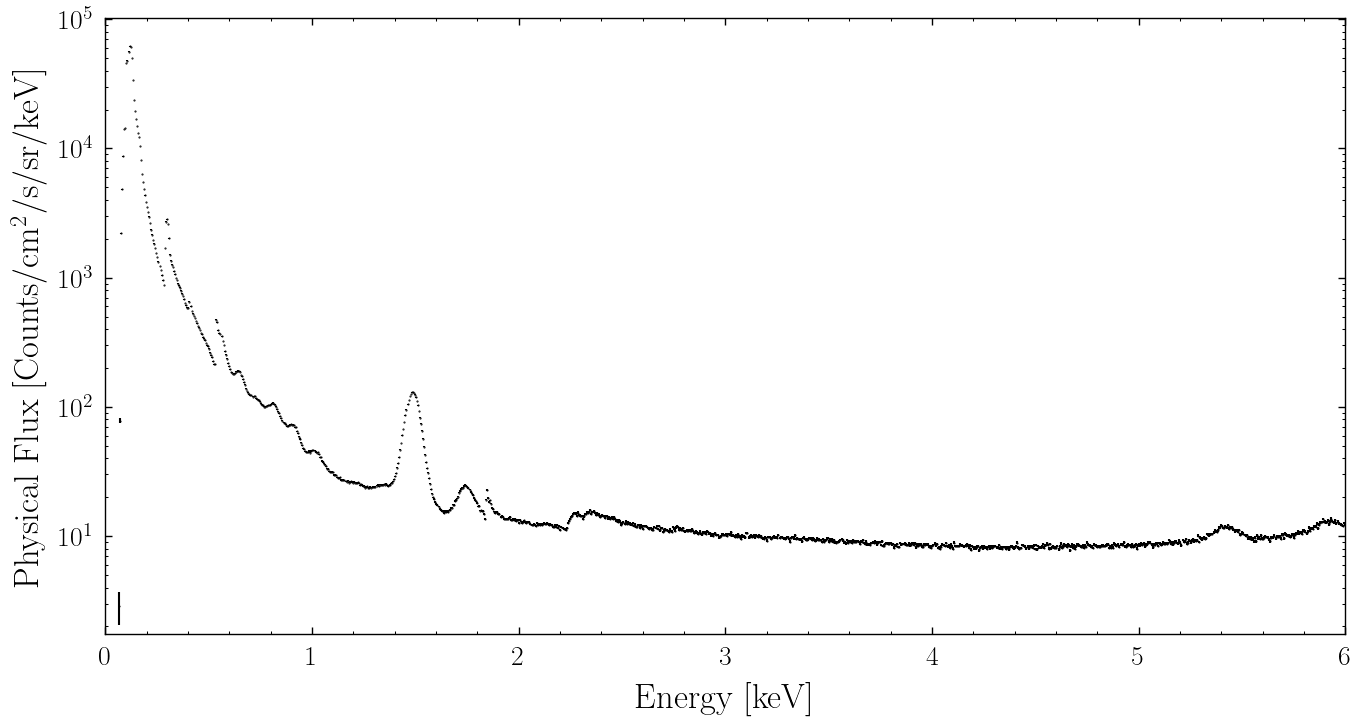

In [7]:
Emean_Out = np.mean([Emin_Out,Emax_Out],axis=0)
dE_Out = Emax_Out - Emin_Out
with np.errstate(invalid='ignore', divide='ignore'):
    Physical_Flux = Counts / Wht / Eff_Area / dE_Out
    Err = np.sqrt(Counts) / Wht / Eff_Area / dE_Out

plt.errorbar(Emean_Out, Physical_Flux, yerr = Err, fmt = '.', ms = 1, color = 'k')
plt.xlim(0,6)
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel('Physical Flux [Counts/cm$^2$/s/sr/keV]');

Finally, we compare to [various models of the CXB](https://arxiv.org/abs/1702.01660). Again, we find that our data is a bit larger because it is dominated by instrumental noise.

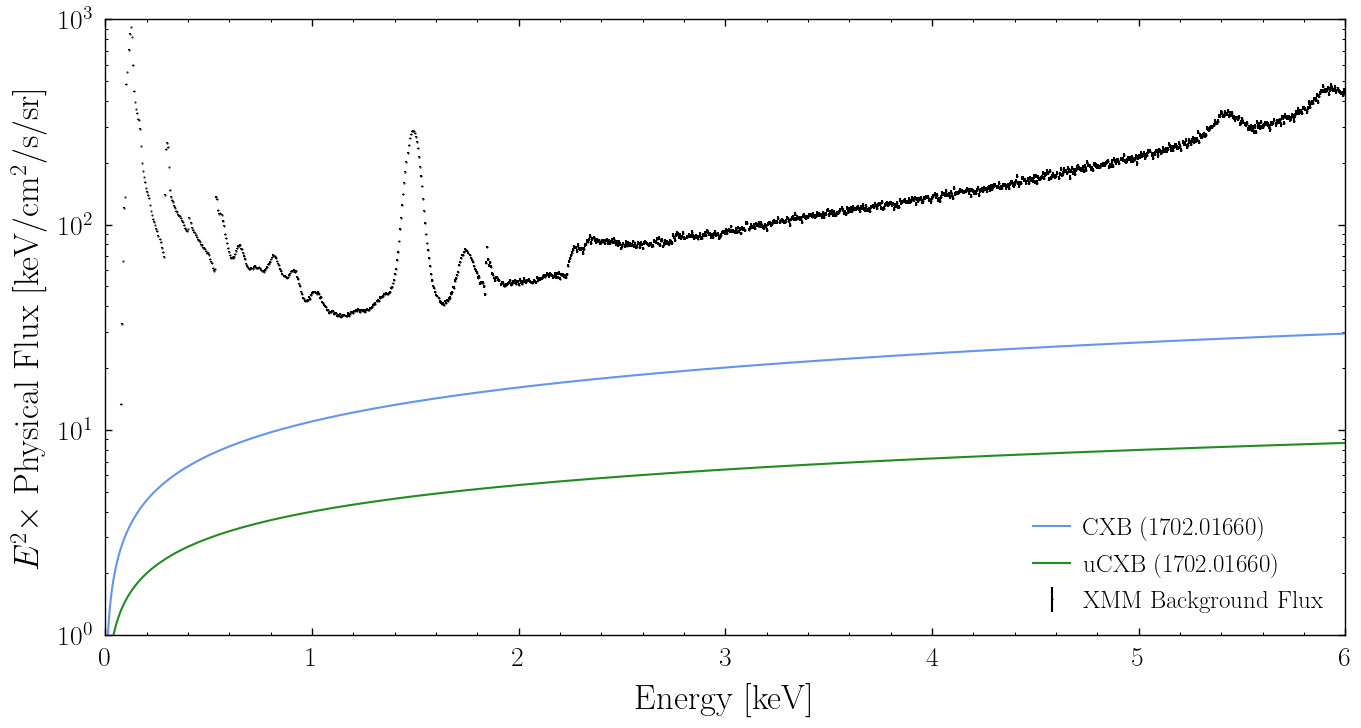

In [9]:
Emean_Out = np.mean([Emin_Out,Emax_Out],axis=0)
dE_Out = Emax_Out - Emin_Out
with np.errstate(invalid='ignore', divide='ignore'):
    Physical_Flux = Emean_Out**2 * Counts / Wht / Eff_Area / dE_Out
    Err = Emean_Out**2 * np.sqrt(Counts) / Wht / Eff_Area / dE_Out
CXB = 11 * Emean_Out**-1.45 * Emean_Out**2
uCXB = 4 * Emean_Out**-1.57 * Emean_Out**2

plt.errorbar(Emean_Out, Physical_Flux, yerr = Err, fmt = '.', ms = 1, color = 'k', label = 'XMM Background Flux')
plt.plot(Emean_Out, CXB, label = 'CXB (1702.01660)')
plt.plot(Emean_Out, uCXB, label = 'uCXB (1702.01660)')
plt.xlim(0, 6)
plt.ylim(1e0, 1e3)
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel(r'$E^2 \times\ $Physical Flux [keV/cm$^2$/s/sr]')
plt.legend(frameon = False);